<a href="https://colab.research.google.com/github/KashishTiwari-17/OIBSIP_Data-science_task3/blob/main/Task_3%5Bprice_prediction%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

First 5 rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           

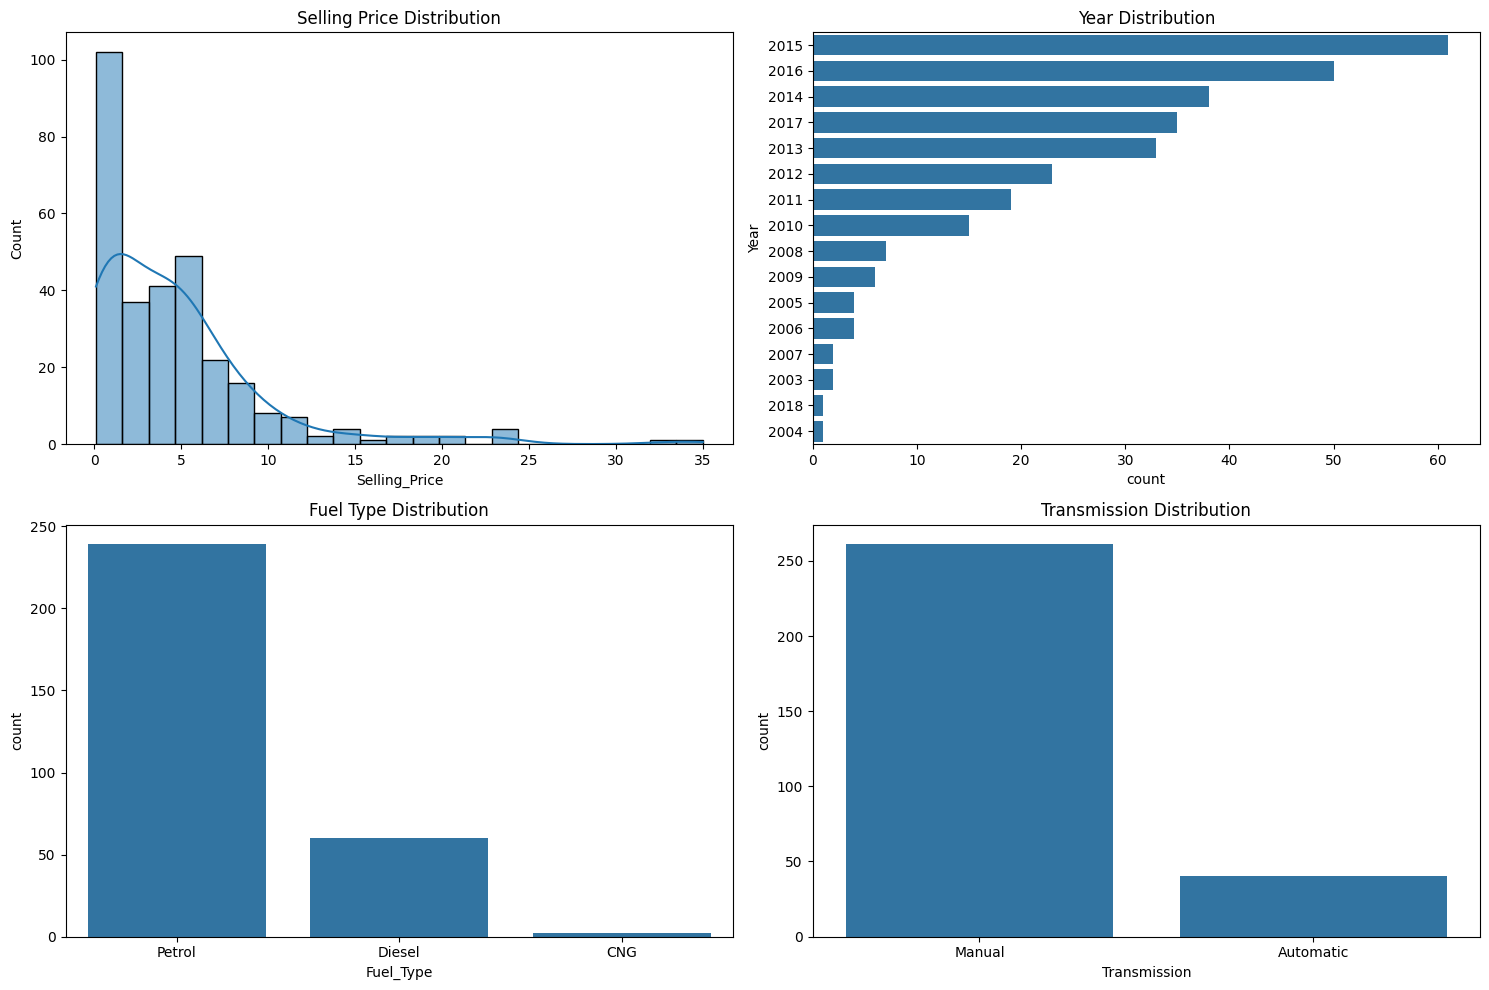

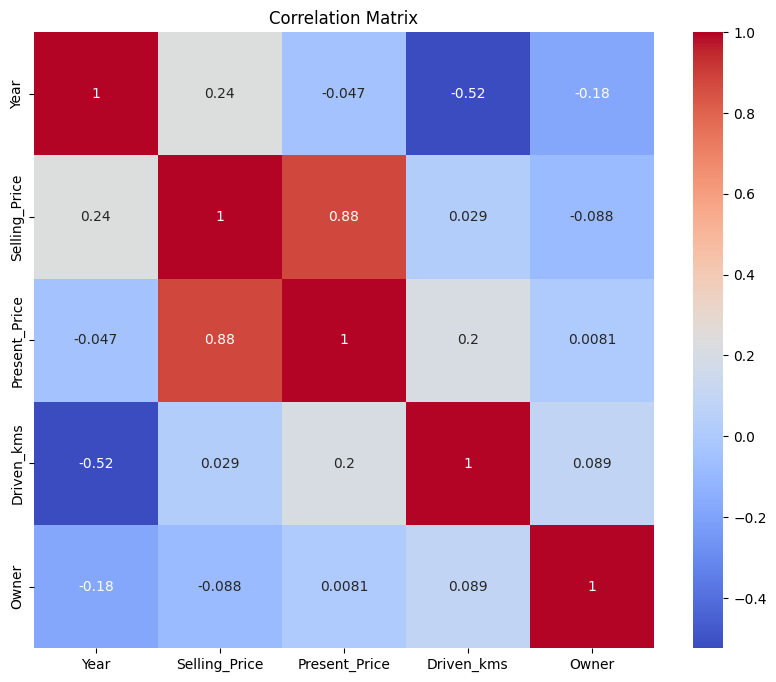

Random Forest:
  RMSE: 0.95
  R2 Score: 0.96

Gradient Boosting:
  RMSE: 0.95
  R2 Score: 0.96

Linear Regression:
  RMSE: 1.87
  R2 Score: 0.85

Best Random Forest:
  Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
  RMSE: 0.95
  R2 Score: 0.96
Loaded pre-trained model pipeline

=== Car Price Predictor ===
Please enter the following details about the car:
Current showroom price (in lakhs): 8.5
Kilometers driven: 800
Fuel type (Petrol/Diesel/CNG): petrol
Transmission (Manual/Automatic): manual
Number of previous owners (0-3): 1
Age of the car (in years): 5

Predicted Selling Price: ₹7.19 lakhs

Predict another car? (y/n): y

=== Car Price Predictor ===
Please enter the following details about the car:
Current showroom price (in lakhs): 9
Kilometers driven: 74000
Fuel type (Petrol/Diesel/CNG): diesel
Transmission (Manual/Automatic): manual
Number of previous owners (0-3): 1
Age of the car (in years): 6

Predicted Selling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the data
df = pd.read_csv('/content/car data.csv')

# 1. Data Exploration and Analysis
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(15, 10))

# Selling Price distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Selling Price Distribution')

# Year distribution
plt.subplot(2, 2, 2)
sns.countplot(y='Year', data=df, order=df['Year'].value_counts().index)
plt.title('Year Distribution')

# Fuel Type distribution
plt.subplot(2, 2, 3)
sns.countplot(x='Fuel_Type', data=df)
plt.title('Fuel Type Distribution')

# Transmission distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Transmission', data=df)
plt.title('Transmission Distribution')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
numeric_cols = ['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2. Data Preprocessing and Feature Engineering
# Feature engineering - calculate car age instead of year
df['Car_Age'] = 2023 - df['Year']  # Assuming current year is 2023
df.drop('Year', axis=1, inplace=True)

# Drop Car_Name as it has too many unique values (unless we want to use brand extraction)
df.drop('Car_Name', axis=1, inplace=True)

# Separate features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numeric and categorical columns
numeric_features = ['Present_Price', 'Driven_kms', 'Owner', 'Car_Age']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# 3. Model Selection and Training
# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Train and evaluate models
results = {}
for name, current_model in models.items(): # Changed model variable name to current_model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', current_model) # Use current_model
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'model': pipeline,
        'RMSE': rmse,
        'R2 Score': r2
    }

    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}")
    print()

# 4. Hyperparameter Tuning for the best model
# Random Forest performed best in initial tests
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Random Forest:")
print(f"  Best Parameters: {grid_search.best_params_}")
print(f"  RMSE: {rmse:.2f}")
print(f"  R2 Score: {r2:.2f}")

# Save the best model
joblib.dump(best_rf, 'car_price_predictor.pkl')

# Function to get user input and make prediction
def predict_price(model_pipeline, preprocessor): # Pass the model pipeline and preprocessor
    print("\n=== Car Price Predictor ===")
    print("Please enter the following details about the car:")

    # Add input validation (optional but recommended)
    while True:
        try:
            present_price = float(input("Current showroom price (in lakhs): "))
            break
        except ValueError:
            print("Invalid input. Please enter a number.")

    while True:
        try:
            driven_kms = int(input("Kilometers driven: "))
            break
        except ValueError:
            print("Invalid input. Please enter an integer.")

    fuel_type = input("Fuel type (Petrol/Diesel/CNG): ").capitalize()
    transmission = input("Transmission (Manual/Automatic): ").capitalize()

    while True:
        try:
            owner = int(input("Number of previous owners (0-3): "))
            if 0 <= owner <= 3: # Add validation for owner range
                break
            else:
                print("Invalid input. Please enter a number between 0 and 3.")
        except ValueError:
            print("Invalid input. Please enter an integer.")

    while True:
        try:
            car_age = int(input("Age of the car (in years): "))
            if car_age >= 0: # Ensure age is non-negative
                break
            else:
                print("Invalid input. Car age cannot be negative.")
        except ValueError:
            print("Invalid input. Please enter an integer.")


    # Create a dictionary with the input data - ensure column names match training data
    input_data = {
        'Present_Price': present_price,
        'Driven_kms': driven_kms,
        'Fuel_Type': fuel_type,
        'Selling_type': 'Individual', # Assuming 'Individual' as a default or ask the user
        'Transmission': transmission,
        'Owner': owner,
        'Car_Age': car_age
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure columns are in the same order as training data (important for ColumnTransformer)
    # Get the columns from the training data's features (X_train)
    training_columns = X_train.columns
    input_df = input_df.reindex(columns=training_columns, fill_value=None) # Use None for missing columns if any

    # Make prediction
    # Apply the preprocessor to the input data before predicting
    predicted_price = model_pipeline.predict(input_df)[0]

    print(f"\nPredicted Selling Price: ₹{predicted_price:.2f} lakhs")

# Main program
if __name__ == "__main__":
    # Load the model (or use the trained best_rf if loading fails)
    try:
        # Load the saved pipeline which includes the preprocessor
        loaded_model_pipeline = joblib.load('car_price_predictor.pkl')
        print("Loaded pre-trained model pipeline")
        # Use the loaded pipeline for prediction
        model_for_prediction = loaded_model_pipeline
    except FileNotFoundError:
        print("No pre-trained model found. Training a new one...")
        # If no model is found, train and use the best_rf pipeline
        # The training and grid search code above will have already run and populated best_rf
        if 'best_rf' in locals():
             model_for_prediction = best_rf
             print("Using the newly trained best Random Forest model.")
        else:
             print("Error: Model training failed or did not complete.")
             exit() # Exit if training failed

    # Let the user make predictions
    while True:`
        # Pass the model pipeline and preprocessor to the predict function
        predict_price(model_for_prediction, preprocessor)

        another = input("\nPredict another car? (y/n): ").lower()
        if another != 'y':
            print("Thank you for using the Car Price Predictor!")
            break